# Students Enrolment Status 
Link to competition: https://www.kaggle.com/competitions/students-drop-out-prediction/overview

### Description
The monitoring and support of university students are considered very important at many educational institutions. In this competition, the problem is formulated as a three-category classification task (dropout, enrolled, and graduate) and the classes are coded as 0,1 and 2 in the dataset.

Here is a handy link to Kaggle's competition documentation, which includes, among other things, instructions on submitting predictions.

### Evaluation
The evaluation metric for this competition is [Mean F1-Score](https://en.wikipedia.org/wiki/F-score). The F1 score, commonly used in information retrieval, measures accuracy using the statistics precision and recall. Precision is the ratio of true positives to all predicted positives. Recall is the ratio of true positives to all actual positives. The F1 metric weights recall and precision equally, and a good retrieval algorithm will maximize both precision and recall simultaneously. Thus, moderately good performance on both will be favored over extremely good performance on one and poor performance on the other. ## Submission Format **For every author in the dataset**, submission files should contain two columns: `id` and `label`. The file should contain a header and have the following format: ``` id,label 0,1 1,0 2,1 ```



## Load the Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import type_of_target
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-drop-out-prediction/train.csv
/kaggle/input/students-drop-out-prediction/test.csv


### Read into Dataframe

In [2]:
df = pd.read_csv("/kaggle/input/students-drop-out-prediction/train.csv")
df.head()

,id,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,...,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40,label
0,0,3,6,11,55,1,1,16,5,60,...,-0.3,0.79,1,93,47,1,48,26,0,1
1,1,8,94,12,65,1,4,22,4,173,...,5.4,6.51,6,29,37,25,53,35,7,2
2,2,3,166,10,155,1,1,16,1,309,...,0.6,2.02,1,8,34,4,43,38,2,1
3,3,3,6,13,121,1,1,16,1,6,...,0.6,2.02,7,37,40,27,43,65,0,1
4,4,4,51,18,21,1,17,22,118,168,...,8.4,12.51,16,22,25,25,24,23,1,1


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3796 entries, 0 to 3795
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      3796 non-null   int64  
 1   v_21    3796 non-null   int64  
 2   v_32    3796 non-null   int64  
 3   v_15    3796 non-null   int64  
 4   v_4     3796 non-null   int64  
 5   v_1     3796 non-null   int64  
 6   v_8     3796 non-null   int64  
 7   v_12    3796 non-null   int64  
 8   v_25    3796 non-null   int64  
 9   v_20    3796 non-null   int64  
 10  v_18    3796 non-null   int64  
 11  v_3     3796 non-null   int64  
 12  v_11    3796 non-null   int64  
 13  v_14    3796 non-null   int64  
 14  v_26    3796 non-null   int64  
 15  v_27    3796 non-null   int64  
 16  v_30    3796 non-null   int64  
 17  v_9     3796 non-null   int64  
 18  v_31    3796 non-null   int64  
 19  v_28    3796 non-null   int64  
 20  v_13    3796 non-null   int64  
 21  v_33    3796 non-null   int64  
 22  

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3796.0,1897.500000,1095.955139,0.00,948.75,1897.50,2846.25,3795.00
v_21,3796.0,4.817439,6.166860,3.00,3.00,3.00,4.00,61.00
v_32,3796.0,70.825606,56.110329,6.00,6.00,89.00,116.00,176.00
v_15,3796.0,11.609062,2.576362,9.00,10.00,10.00,12.00,25.00
v_4,3796.0,99.329294,45.017380,9.00,55.00,101.00,146.00,176.00
v_1,3796.0,0.911486,0.284079,0.00,1.00,1.00,1.00,1.00
v_8,3796.0,3.436249,4.577644,1.00,1.00,1.00,3.00,25.00
v_12,3796.0,18.970495,15.010042,16.00,16.00,16.00,16.00,179.00
v_25,3796.0,97.203372,79.213308,1.00,5.00,110.00,181.00,289.00
v_20,3796.0,166.138567,103.121322,6.00,60.00,168.00,251.00,322.00


In [5]:
X = df.drop(columns = "label")
X.head()

,id,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,...,v_7,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40
0,0,3,6,11,55,1,1,16,5,60,...,13.9,-0.3,0.79,1,93,47,1,48,26,0
1,1,8,94,12,65,1,4,22,4,173,...,14.9,5.4,6.51,6,29,37,25,53,35,7
2,2,3,166,10,155,1,1,16,1,309,...,11.1,0.6,2.02,1,8,34,4,43,38,2
3,3,3,6,13,121,1,1,16,1,6,...,11.1,0.6,2.02,7,37,40,27,43,65,0
4,4,4,51,18,21,1,17,22,118,168,...,10.9,8.4,12.51,16,22,25,25,24,23,1


In [6]:
y = df["label"]
y

0       1
1       2
2       1
3       1
4       1
       ..
3791    2
3792    2
3793    0
3794    1
3795    0
Name: label, Length: 3796, dtype: int64

In [7]:
from sklearn.utils.multiclass import type_of_target
type_of_target(y)

'multiclass'

In [8]:
target_names = np.unique(y)
print(f'Number of labels: {len(target_names)} \nLabels: {target_names}')

Number of labels: 3 
Labels: [0 1 2]


In [9]:
label_count = [y.value_counts()[0], y.value_counts()[1], y.value_counts()[2]]
print(f'Class 0 - {label_count[0]} \nClass 1 - {label_count[1]} \nClass 2 - {label_count[2]}')

Class 0 - 1243 
Class 1 - 1863 
Class 2 - 690


1. Class 0 - Dropout 

2. Class 1 - Enrolled

3. Class 2 - Graduate

In [10]:
def calculate_percentage(class_num: int) -> float:
    count = y.value_counts()[class_num]
    total = 3796
    percentage = round((count/total)*100, 2)
    return (f"{percentage}%")

percent_0 = calculate_percentage(0)
percent_1 = calculate_percentage(1)
percent_2 = calculate_percentage(2)
print("Class 0 - " + percent_0, "Class 1 - " + percent_1, "Class 2 - " + percent_2, sep = "\n")

Class 0 - 32.74%
Class 1 - 49.08%
Class 2 - 18.18%


<BarContainer object of 3 artists>

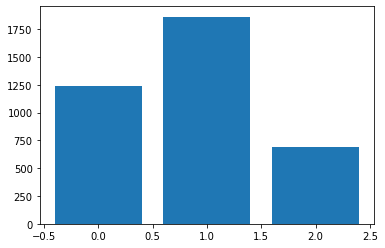

In [11]:
plt.bar(target_names, label_count)

AxesSubplot(0.125,0.125;0.62x0.755)


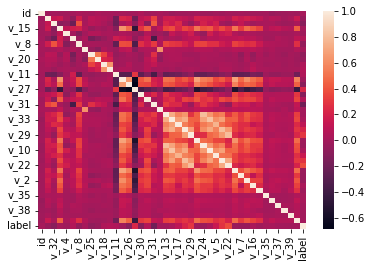

In [12]:
import seaborn as sns

print(sns.heatmap(df.corr()))

## Train the model

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 10)

In [14]:
print(f'Shape of X_train - {X_train.shape}')
print(f'Shape of y_train - {y_train.shape} \n')
print(f'Shape of X_test - {X_test.shape}')
print(f'Shape of y_test - {y_test.shape}')

Shape of X_train - (3036, 42)
Shape of y_train - (3036,) 

Shape of X_test - (760, 42)
Shape of y_test - (760,)


### Dummy Classifier - Baseline

In [15]:
from sklearn.dummy import DummyClassifier

base_clf = DummyClassifier(strategy = "most_frequent")
base_clf.fit(X_train, y_train)
print(base_clf.score(X_train, y_train))
print(base_clf.score(X_test, y_test))

0.49110671936758893
0.48947368421052634


In [16]:
from sklearn.metrics import classification_report, confusion_matrix
y_true = y_test
y_pred = base_clf.predict(X_test)
print(classification_report(y_true, y_pred, zero_division = 0))
print(confusion_matrix(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       252
           1       0.49      1.00      0.66       372
           2       0.00      0.00      0.00       136

    accuracy                           0.49       760
   macro avg       0.16      0.33      0.22       760
weighted avg       0.24      0.49      0.32       760

[[  0 252   0]
 [  0 372   0]
 [  0 136   0]]


In [17]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.fit_transform(X_test)

### Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier


rand_clf = RandomForestClassifier(random_state = 10)
rand_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=10)

In [19]:
train_acc = round(rand_clf.score(X_train_scaled, y_train), 6)
test_acc = round(rand_clf.score(X_test_scaled, y_test), 6)

print(f'Training accuracy: {train_acc}, Testing Accuracy: {test_acc}')

Training accuracy: 1.0, Testing Accuracy: 0.748684


In [20]:
y_true = y_test
y_pred = rand_clf.predict(X_test_scaled)
print(classification_report(y_true, y_pred, zero_division = 0))
print(confusion_matrix(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       252
           1       0.76      0.90      0.83       372
           2       0.59      0.30      0.40       136

    accuracy                           0.75       760
   macro avg       0.71      0.66      0.66       760
weighted avg       0.73      0.75      0.73       760

[[193  45  14]
 [ 22 335  15]
 [ 36  59  41]]


### Hyperparameter Tuning

In [21]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini', 'entropy'], 'min_samples_split': [3, 4]}
rand_clf_2 = GridSearchCV(rand_clf, parameters, return_train_score= True)
rand_clf_2.fit(X_train_scaled, y_train)
rand_clf_2.cv_results_

{'mean_fit_time': array([0.64070206, 0.64439583, 0.73208103, 0.72402844]),
 'std_fit_time': array([0.00688436, 0.02255696, 0.00820528, 0.00702285]),
 'mean_score_time': array([0.02646217, 0.02799883, 0.02728791, 0.02637014]),
 'std_score_time': array([0.00038837, 0.00269475, 0.00100053, 0.00036906]),
 'param_criterion': masked_array(data=['gini', 'gini', 'entropy', 'entropy'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[3, 4, 3, 4],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'criterion': 'gini', 'min_samples_split': 3},
  {'criterion': 'gini', 'min_samples_split': 4},
  {'criterion': 'entropy', 'min_samples_split': 3},
  {'criterion': 'entropy', 'min_samples_split': 4}],
 'split0_test_score': array([0.74013158, 0.74013158, 0.72039474, 0.73190789]),
 'split1_test_score': array([0.72981878, 0.73146623, 0.73146623, 0

In [22]:
rand_clf_2.best_score_

0.7368263894910256

In [23]:
rand_clf_2.best_estimator_

RandomForestClassifier(criterion='entropy', min_samples_split=4,
                       random_state=10)

### Submit the csv

In [24]:
X_test = pd.read_csv("/kaggle/input/students-drop-out-prediction/test.csv")

In [25]:
X_test_scaled = std_scaler.fit_transform(X_test)

In [26]:
prediction = rand_clf_2.predict(X_test_scaled)

In [27]:
X_test['label'] = prediction
column_1 = X_test['id'].to_numpy()
column_2 = X_test['label'].to_numpy()
df = np.column_stack((column_1,column_2))
pd.DataFrame(df, columns = ['id','label']).to_csv('sixth_submission.csv',index=False)